In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def solve_linear_model(x0, y0, x1, y1):
    k = (y1-y0)/(x1-x0)
    b = y0 - k*x0
    # y = kx+b
    #print("y = {}x + {}".format(k, b))
    def f(x):
        return k*x+b
    return f

def interpolate_age(depth):
    "data source https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1029%2F2008PA001601&file=palo1497-sup-0001-t01.txt"
    if depth <= 48:
        f = solve_linear_model(8, 630, 48, 4423)
    elif depth <= 98:
        f = solve_linear_model(48, 4423, 98, 9495)
    elif depth <= 173:
        f = solve_linear_model(98, 9495, 173, 12230)
    elif depth <= 248:
        f = solve_linear_model(173, 12230,248,12452)
    elif depth <= 293:
        f = solve_linear_model(248,12452, 293, 12850)
    elif depth <= 378:
        f = solve_linear_model(293, 12850,378,13602)
    elif depth <= 418:
        f = solve_linear_model(378,13602, 418, 14485)
    elif depth <= 483:
        f = solve_linear_model(418, 14485,483,16286)
    elif depth <= 508:
        f = solve_linear_model(483,16286, 508,17199)
    elif depth <= 553:
        f = solve_linear_model(508,17199, 553, 17535)
    elif depth <= 688:
        f = solve_linear_model(553, 17535, 688, 19293)
    elif depth <= 803:
        f = solve_linear_model(688, 19293,803,23854)
    elif depth <= 868:
        f = solve_linear_model(803,23854, 868,27946)
    return(f(depth))

#test: interpolate_age(48)
# sucess if 4455

In [3]:
ngrip = pd.read_csv("../data/deglaciation_climate/ngrip_d18O_clean_rui.csv")
ngrip = ngrip[ngrip['Age_kaBP']<21]

hendry_2016 = pd.read_csv("../data/deglaciation_climate/hendry_2016_clean_rui.csv")
hendry_2016 = hendry_2016[hendry_2016['Age model [ka]']<21]
hendry_2016 = hendry_2016[['Age model [ka]','δ30Si bSiO2 [‰]']].dropna()

meckler_2013a = pd.read_csv("../data/deglaciation_climate/Meckler_2013_MD03-2705_230Tnorm_opal.tab",sep="\t")
meckler_2013a = meckler_2013a[meckler_2013a['Age model [ka]']<21]
meckler_2013a = meckler_2013a[['Age model [ka]','Opal flux [g/cm**2/ka]']].dropna()

adkins_2006 = pd.read_csv("../data/deglaciation_climate/Adkins_2006_658C.csv")
adkins_2006['Age'] = adkins_2006['Age']/1000
adkins_2006 = adkins_2006[adkins_2006['Age']<21]
adkins_2006 = adkins_2006[['Age','Opal (mg/cm^2*kyr)']].dropna()

meckler_2013b = pd.read_csv("../data/deglaciation_climate/Meckler_2013_108-658_ln(Si_Al).tab",sep="\t")
meckler_2013b = meckler_2013b[meckler_2013b['Age model [ka]']<21]
meckler_2013b = meckler_2013b[['Age model [ka]','ln(Si/Al)']].dropna()

romero_2008 = pd.read_csv("../data/deglaciation_climate/Romero_2008_GeoB7926-2_diatoms_opal_TOC_CaCO3_SST.tab" ,sep="\t")

# Depth m -> Depth in cm -> Age in yr -> Age in ka
romero_2008['Age'] = np.array(list(map(interpolate_age, romero_2008['Depth sed [m]'] * 100)))/1000
romero_2008 = romero_2008[['Age','bSiO2 [%]']].dropna()
romero_2008 = romero_2008[romero_2008['Age']<21]

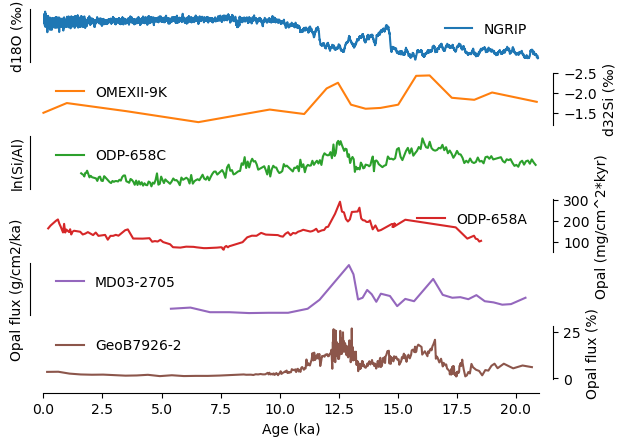

In [4]:
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
        ax.yaxis.set_label_position('left')
    if 'right' in spines:
        ax.yaxis.set_ticks_position('right')
        ax.yaxis.set_label_position('right')
    else:
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        ax.xaxis.set_ticks([])

fig = plt.figure()
chronology = (0,21)

ax = fig.add_subplot(6, 1, 1)
ax.plot(ngrip['Age_kaBP'], ngrip['d18O'], "C0", label="NGRIP",  clip_on=False)
adjust_spines(ax, ['left'])
ax.set(xlim=chronology, ylabel="d18O (‰)")
plt.legend(frameon=False)

# C1 -> color label
ax = fig.add_subplot(6, 1, 2)
ax.plot(hendry_2016['Age model [ka]'], hendry_2016['δ30Si bSiO2 [‰]'], "C1", label="OMEXII-9K", clip_on=False)
adjust_spines(ax, ['right'])
ax.set(xlim=chronology,ylim=(-1.2, -2.5), ylabel="d32Si (‰)")
plt.legend(frameon=False)

ax = fig.add_subplot(6, 1, 3)
ax.plot(meckler_2013b['Age model [ka]'], meckler_2013b['ln(Si/Al)'], "C2", label="ODP-658C", clip_on=False)
ax.set(xlim=chronology, ylabel="ln(Si/Al)")
adjust_spines(ax, ['left'])
plt.legend(frameon=False)

ax = fig.add_subplot(6, 1, 4)
ax.plot(adkins_2006['Age'], adkins_2006['Opal (mg/cm^2*kyr)'], "C3", label="ODP-658A",clip_on=False)
adjust_spines(ax, ['right'])
ax.set(xlim=chronology, ylabel="Opal (mg/cm^2*kyr)")
plt.legend(frameon=False)

# 230Th-normalized opal flux from core MD03-2705
ax = fig.add_subplot(6, 1, 5)
ax.plot(meckler_2013a['Age model [ka]'], meckler_2013a['Opal flux [g/cm**2/ka]'], "C4",label="MD03-2705",clip_on=False)
adjust_spines(ax, ['left',""])
ax.set(xlim=chronology, ylabel="Opal flux (g/cm2/ka)")
plt.legend(frameon=False)

# 230Th-normalized opal flux from core MD03-2705
ax = fig.add_subplot(6, 1, 6)
ax.plot(romero_2008['Age'], romero_2008['bSiO2 [%]'], "C5",label="GeoB7926-2",clip_on=False)
adjust_spines(ax, ['right', 'bottom'])
ax.set(xlim=chronology, ylabel="Opal flux (%)", xlabel="Age (ka)")
plt.legend(frameon=False)

plt.show()
fig.savefig("../output/deglacial_productivity.pdf", dpi=300)